In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re 
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk import ngrams
import spacy
%matplotlib inline

wordnet = WordNetLemmatizer()
sp = spacy.load('en_core_web_sm')
all_stopwords = sp.Defaults.stop_words

In [ ]:
def clean_text(text,stopwords):
    text = re.sub('[^a-zA-Z]', ' ',text)
    text = text.lower()
    text = text.split(' ')
    text = [wordnet.lemmatize(word) for word in text]
    text = [word for word in text if word not in stopwords]
    text = ' '.join(text)
    return text

def combine_data(list1, list2):
    combined_data = []
    for i in range(len(list1)):
        new_str = list1[i] +' ' + list2[i]
        combined_data.append(new_str)
    return combined_data

def generate_frequency(text_list):
    fdist =  FreqDist()
    for i in text_list:
        words = i.split(' ')
        words = [word for word in words if word != '']
        words = ngrams(words,1)
        for x in words:
            fdist[x[0]]+=1
    return fdist

In [ ]:
df = pd.read_csv('/content/RedditTerrorismData.csv')

In [ ]:
df.head()

,id,subreddit,title,text
0,greo4o,SuicideWatch,“If you truly wanted to kill yourself and wasn...,"Yeah because I DONT WANT TO FUCKING DO IT, but..."
1,c34ko8,SuicideWatch,My girlfriend killed herself a week after we b...,Hello. I don't really know how to start this. ...
2,f9d5go,SuicideWatch,Anyone else not want to die and not want to ki...,NaN
3,e8gjky,SuicideWatch,Raped in front of my girlfriend. feeling like ...,"\n\nI don't know what to say or do, I just fe..."
4,kn89hg,SuicideWatch,"""Suicide is a permanent solution to a temporar...",NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         1000 non-null   object
 1   subreddit  1000 non-null   object
 2   title      1000 non-null   object
 3   text       21 non-null     object
dtypes: object(4)
memory usage: 31.4+ KB


In [ ]:
new_words = ["http", "www", "co", "u", "com", "t", "s", "m",
             "ve", "dy", "ll", 'n', 'r', 'b', "wa", "y", "don", "ha"]
for words in new_words:
    all_stopwords.add(words)

In [ ]:
df['text'].fillna(value=' ',inplace=True)

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df['title'] = df['title'].apply(clean_text, stopwords = all_stopwords)
df['text'] = df['text'].apply(clean_text, stopwords = all_stopwords)

In [ ]:
df['cleaned'] = combine_data(df['title'],df['text'])

In [ ]:
df.to_csv('./cleanedRedditTerrorism.csv', index=False)

In [ ]:
fdist = generate_frequency(df['cleaned'])
top_words = fdist.most_common(n=150)

In [ ]:
word_dict = {}
for i in range(len(top_words)):
    word_dict[top_words[i][0]] = top_words[i][1]

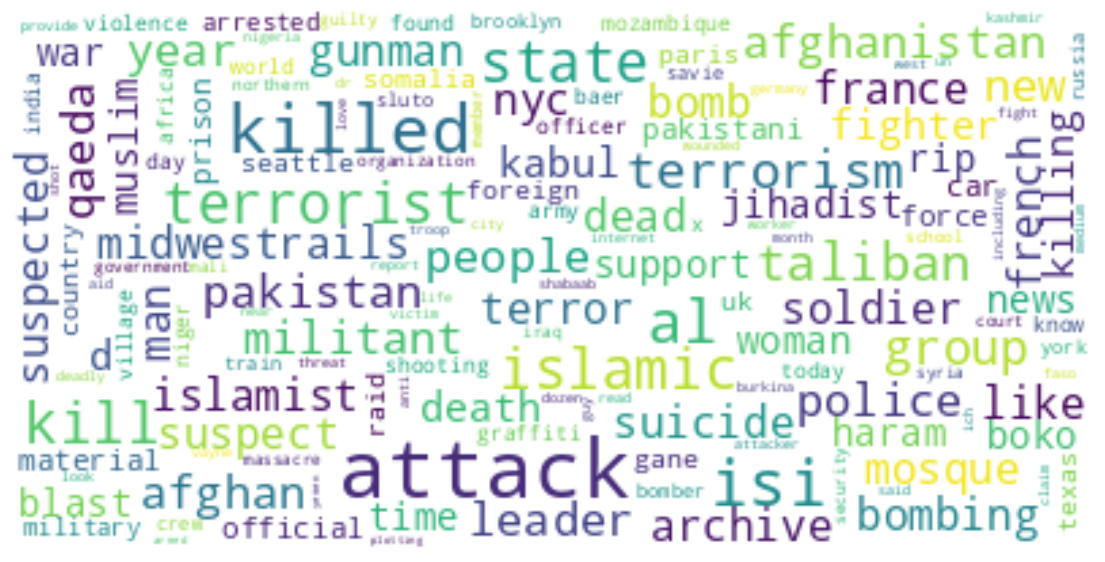

In [ ]:
wordcloud = WordCloud(background_color="white",max_font_size=30).generate_from_frequencies(word_dict)

plt.figure(figsize = (14, 8)) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df = pd.read_csv('/content/TwitterTerroismData.csv')

In [ ]:
df.head()

,id,date,text
0,1361102918728884230,2021-02-14 23:59:58+00:00,@CourageBipolar @VoltzRoad @BAIntactivists had...
1,1361102815104557057,2021-02-14 23:59:33+00:00,@pcrafton4 @MrMan45676274 @beardedmilkdud6 @Ci...
2,1361102759966224386,2021-02-14 23:59:20+00:00,@langoo @St3v3ns1 @BFryback Sounds like the mo...
3,1361102721139499016,2021-02-14 23:59:11+00:00,tw // suicide ??\n\nsomeone talk me out of it pls
4,1361102674079457281,2021-02-14 23:59:00+00:00,Death metal looked to have exhaled its last by...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   date    2000 non-null   object
 2   text    2000 non-null   object
dtypes: int64(1), object(2)
memory usage: 47.0+ KB


In [ ]:
df['cleaned'] = df['text'].apply(clean_text,stopwords = all_stopwords)

In [ ]:
df.to_csv('./cleanedTwitterTerrorism.csv', index=False)

In [ ]:
fdist = generate_frequency(df['cleaned'])
top_words = fdist.most_common(n=150)

In [ ]:
word_dict = {}
for i in range(len(top_words)):
    word_dict[top_words[i][0]] = top_words[i][1]

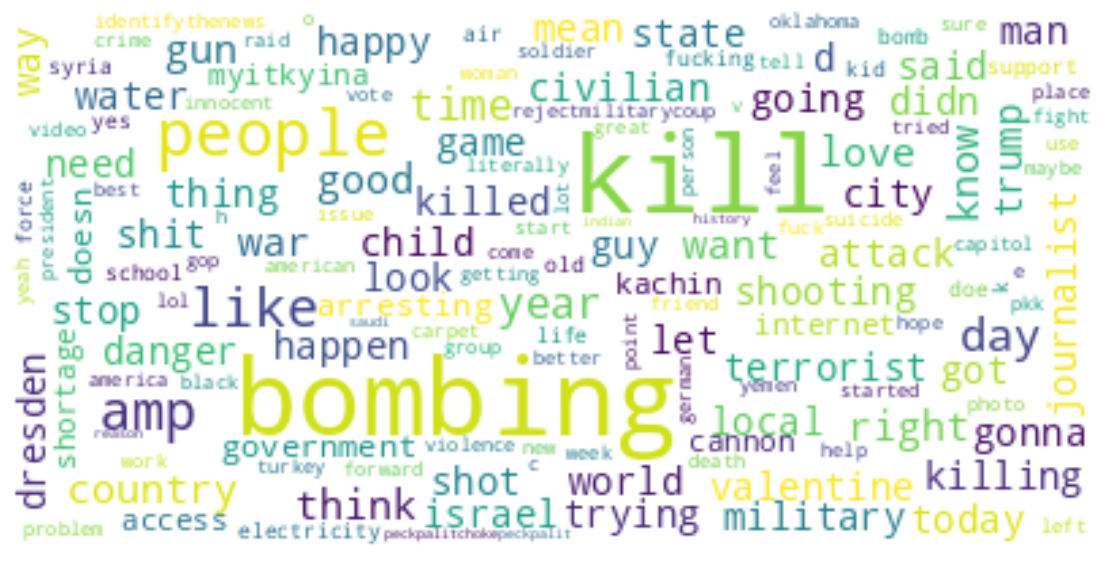

In [ ]:
wordcloud = WordCloud(background_color="white",max_font_size=40).generate_from_frequencies(word_dict)

plt.figure(figsize = (14, 8)) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df = pd.read_csv('/content/NoTerrorismData.csv')

In [ ]:
df.head()

,id,subreddit,title,text
0,62sjuh,movies,The Senate. Upvote this so that people see it ...,NaN
1,11ia0od,movies,"Hi, I’m Keanu Reeves, AMA",NaN
2,iikebv,movies,‘Black Panther’ actor Chadwick Boseman dies at...,NaN
3,tzxev3,movies,"Hello, I’m Nicolas Cage and welcome to Ask Me ...",NaN
4,ztqlgb,movies,"Hi, I’m Tobey Maguire, actor/executive produce...",NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         2000 non-null   object
 1   subreddit  2000 non-null   object
 2   title      2000 non-null   object
 3   text       685 non-null    object
dtypes: object(4)
memory usage: 62.6+ KB


In [ ]:
df['text'].fillna(value=' ',inplace=True)

In [ ]:
df['title'] = df['title'].apply(clean_text,stopwords = all_stopwords)
df['text'] = df['text'].apply(clean_text,stopwords = all_stopwords)

In [ ]:
df['cleaned'] = combine_data(df['title'],df['text'])

In [ ]:
df.to_csv('./cleanedRedditNonTerroism.csv', index=False)

In [ ]:
fdist = generate_frequency(df['cleaned'])
top_words = fdist.most_common(n=150)

In [ ]:
word_dict = {}
for i in range(len(top_words)):
    word_dict[top_words[i][0]] = top_words[i][1]

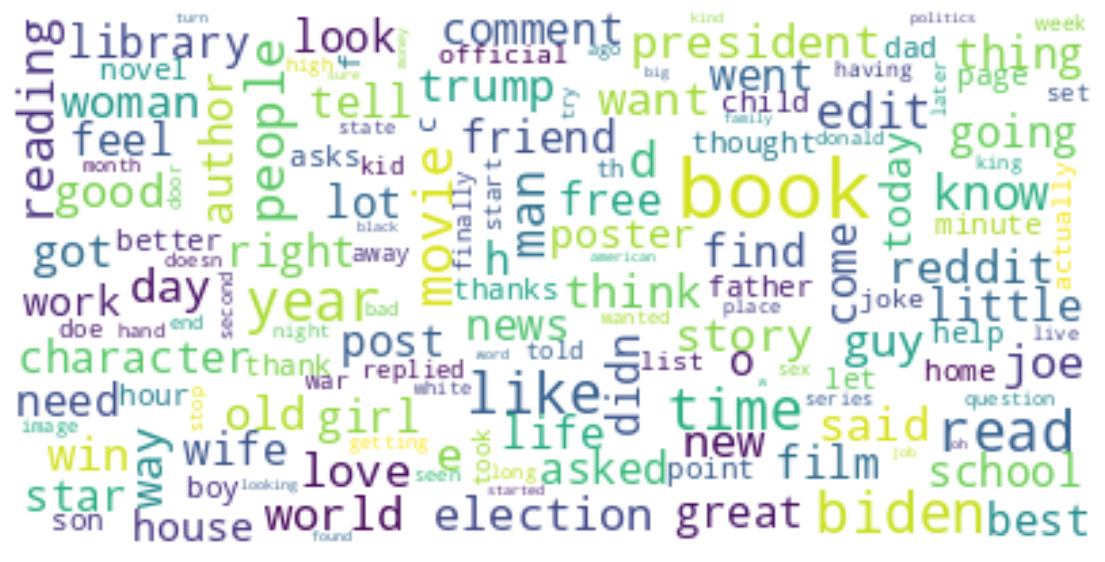

In [ ]:
wordcloud = WordCloud(background_color="white",max_font_size=30).generate_from_frequencies(word_dict)

plt.figure(figsize = (14, 8)) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()